<a href="https://colab.research.google.com/github/MonishSoundarRaj/colab_files_1/blob/main/trans/realtabformer_theta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install realtabformer
!pip install pandas numpy matplotlib seaborn

  Using cached REaLTabFormer-0.1.5-py3-none-any.whl.metadata (11 kB)
  Using cached accelerate-0.29.2-py3-none-any.whl.metadata (18 kB)
  Using cached datasets-2.18.0-py3-none-any.whl.metadata (20 kB)
  Using cached transformers-4.39.3-py3-none-any.whl.metadata (134 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached aiohttp-3.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.5 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
Using cached REaLTabFormer-0.1.5-py3-none-any.whl (49 kB)
Using cached accelerate-0.29.2-py3-none-any.whl (297 kB)
Using cached datasets-2.18.0-py3-none-any.whl (510 kB)
Using cached transformers-4.39.3-py3-none-any.whl (8.8 MB)
Using cached aiohttp-3.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux201

In [ ]:
%cd theta

[Errno 2] No such file or directory: 'theta'
/workspace/theta


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [ ]:
import pandas as pd
import numpy as np
from realtabformer import REaLTabFormer

In [ ]:
th_df = pd.read_csv('df_theta_processed.csv')
th_df.shape

(23387, 8)

In [ ]:
th_df.head()

,u_id,user,gpu_num,cpu_num,node_num,interval,run_time,wall_time
0,0,1,0,32768.0,512.0,0.0,18431.92,21600.0
1,1,1,0,49152.0,768.0,1126233.0,18341.22,21600.0
2,2,2,0,16384.0,256.0,788164.0,2854.59,21600.0
3,3,2,0,16896.0,264.0,1125.0,7644.15,17820.0
4,4,3,0,40960.0,640.0,862573.0,43269.53,43200.0


In [ ]:
th_df.drop('gpu_num', axis=1, inplace=True)

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# NOTE: Remove any unique identifiers in the
# data that you don't want to be modeled.

# Non-relational or parent table.
rtf_model = REaLTabFormer(
    model_type="tabular",
    gradient_accumulation_steps=4,
    epochs = 25,
    logging_steps=500)

# Fit the model on the dataset.
# Additional parameters can be
# passed to the `.fit` method.
rtf_model.fit(th_df)

rtf_model.save("theta_rtb_model/rtf_model/")

# Generate synthetic data with the same
# number of observations as the real dataset.
samples = rtf_model.sample(n_samples=len(th_df))

Computing the sensitivity threshold...
Using parallel computation!!!


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:570: UserWarning: Duplicate rate (0.0) in the data is zero. The `qt_interval` will be set                     to qt_interval_unique=100.
  warnings.warn(


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean      -0.000048
std        0.001850
min       -0.004865
25%       -0.001329
50%       -0.000009
75%        0.001338
max        0.005446
dtype: float64
Sensitivity threshold: 0.0029499740798341113 qt_max: 0.05


Map:   0%|          | 0/23387 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Step,Training Loss
500,1.014600
1000,0.883300
1500,0.864200
2000,0.850600
2500,0.841300
3000,0.834300
3500,0.826300


  0%|          | 0/11574 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 11648 samples generated. Sampling efficiency is: 100.0000%
Critic round: 5,                     sensitivity_threshold: 0.0029499740798341113,                         val_sensitivity: -0.0194616208743736,                             val_sensitivities: [-0.01902229134266459, -0.01996578538102644, -0.018869362363919128, -0.019066355624676, -0.019133229652669777, -0.019043027475375843, -0.019846552617936754, -0.019246241575946087, -0.01970036288232245, -0.020359253499222393, -0.019870917573872472, -0.019816485225505446, -0.019322965266977712, -0.019626749611197508, -0.01903473302229134]


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss
4000,0.819000
4500,0.813200
5000,0.810200
5500,0.802100
6000,0.797500
6500,0.793400
7000,0.785500


  0%|          | 0/11574 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 11648 samples generated. Sampling efficiency is: 100.0000%
Critic round: 10,                     sensitivity_threshold: 0.0029499740798341113,                         val_sensitivity: -0.013250216001382407,                             val_sensitivities: [-0.013196474857439088, -0.013959046137895281, -0.01268118195956454, -0.012362882322446861, -0.012697252462415758, -0.01088284085018144, -0.012831000518403315, -0.011561430793157074, -0.012152410575427684, -0.01379885951270088, -0.015653188180404353, -0.015220839813374805, -0.013465526179367549, -0.014782789009849664, -0.013507516848107828]


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss
7500,0.774100
8000,0.777900
8500,0.768200
9000,0.765700
9500,0.760900
10000,0.750200
10500,0.745600


  0%|          | 0/11574 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 11648 samples generated. Sampling efficiency is: 100.0000%
Critic round: 15,                     sensitivity_threshold: 0.0029499740798341113,                         val_sensitivity: -0.00035811301192327624,                             val_sensitivities: [0.0008958009331259721, -0.0008807672369103163, 0.0006770347330222915, 0.0006236391912908244, 0.0008885432866770349, 0.0016013478486262315, -0.002842923794712286, 0.0016184551581130118, 0.00010264385692068445, -0.0035137376879212025, -0.002603421461897356, -0.002387247278382582, -0.00032089165370658383, -1.5552099533437323e-06, 0.0007713841368584759]


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss
11000,0.722500
11500,0.733500
12000,0.727900
12500,0.724600
13000,0.715600
13500,0.708600
14000,0.705500
14500,0.699000


  0%|          | 0/11574 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 11648 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 20,                     sensitivity_threshold: 0.0029499740798341113,                         val_sensitivity: 0.009762052877138416,                             val_sensitivities: [0.011335406946604459, 0.007944530844997409, 0.010678071539657854, 0.011875583203732505, 0.01112078797304303, 0.010215137376879213, 0.006418351477449457, 0.010783307413167447, 0.0091684810782789, 0.005612234318299638, 0.007868843960601349, 0.009368066355624675, 0.011005702436495592, 0.01080300673924313, 0.01223328149300156]


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Step,Training Loss
15000,0.688700
15500,0.687600
16000,0.683000
16500,0.675100
17000,0.673900
17500,0.669400
18000,0.663900


  0%|          | 0/11574 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 11648 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.0029499740798341113,                         val_sensitivity: 0.01629732158285813,                             val_sensitivities: [0.01718403317781234, 0.016691550025920165, 0.019588906168999484, 0.017959564541213065, 0.018744945567651633, 0.01789372731985485, 0.014089165370658373, 0.019578538102643858, 0.016102643856920684, 0.012066874027993781, 0.013046137895282533, 0.013959564541213063, 0.01659823742871954, 0.013304821150855364, 0.017651114567133225]
Stopping training, no improvement in critic...


/usr/local/lib/python3.10/dist-packages/realtabformer/realtabformer.py:834: UserWarning: No best model was saved. Loading the closest model to the sensitivity_threshold.
  warnings.warn(


Copying artefacts from: best-disc-model
Copying artefacts from: mean-best-disc-model
Copying artefacts from: not-best-disc-model
Copying artefacts from: last-epoch-model


  0%|          | 0/23387 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 23424 samples generated. Sampling efficiency is: 100.0000%


In [ ]:
samples.to_csv("realtabformer_theta.csv", index=False)

In [ ]:
samples_df = pd.read_csv('realtabformer_theta.csv')
samples_df.head()

,u_id,user,cpu_num,node_num,interval,run_time,wall_time
0,20031,1,8192.0,128.0,502.0,3389.14,5400.0
1,6068,1,16384.0,256.0,277.0,3493.50,21600.0
2,12740,10,8192.0,128.0,363.0,7808.57,10800.0
3,22943,8,512.0,8.0,256.0,1293.21,3600.0
4,4429,1,16384.0,256.0,44.0,2306.88,21600.0


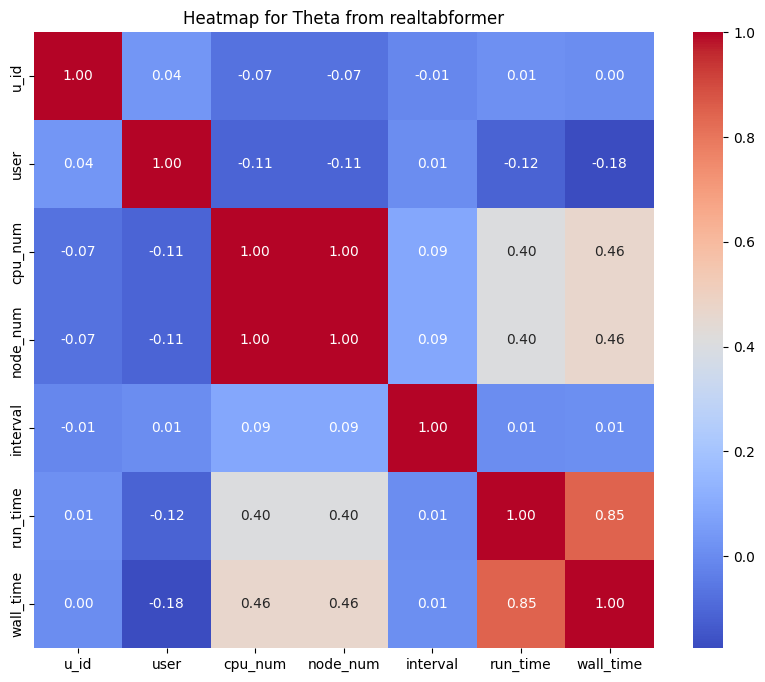

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix_th = samples_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_th, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap for Theta from realtabformer")
plt.show()

# CDFs

In [ ]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

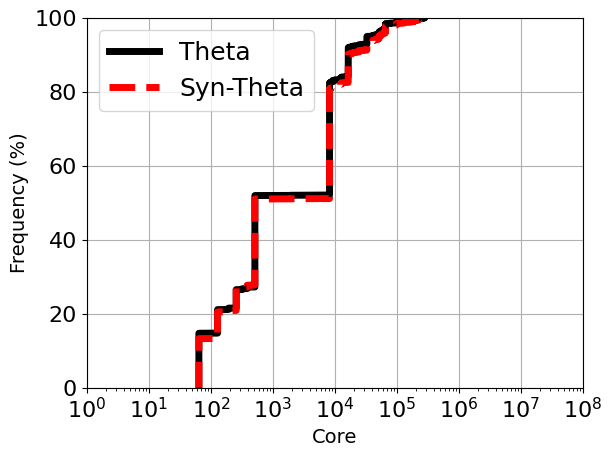

In [ ]:
plot_cdf(th_df["cpu_num"], 100000, "Core", color = "black", linestyle="-")
plot_cdf(samples_df["cpu_num"], 100000, "Core", color = "red", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

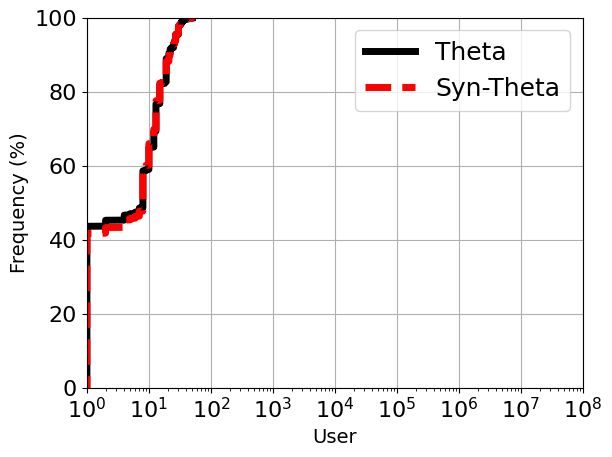

In [ ]:
plt.style.use("default")
plot_cdf(th_df["user"], 1000,"User", color = "black", linestyle="-")
plot_cdf(samples_df["user"], 1000,"User", color = "red", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

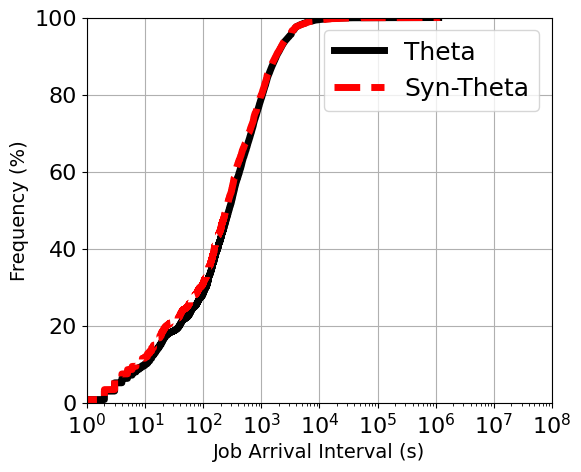

In [ ]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(th_df["interval"], 1000,"Job Arrival Interval (s)", color = "black", linestyle="-")
plot_cdf(samples_df["interval"], 1000,"Job Arrival Interval (s)", color = "red", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

In [ ]:
import shutil
from IPython.display import FileLink

# Define the directory to be zipped
source_dir = 'theta_rtf_model/rtf_model'

# Define the name and path of the zip file
zip_file = 'theta_rtf_model.zip'

# Create the zip file (excluding the .zip extension in the first argument)
shutil.make_archive('theta_rtf_model', 'zip', source_dir)

# Provide a link to download the zip file
display(FileLink(zip_file, result_html_prefix="Click here to download: "))

/workspace/theta/theta_rtf_model.zip